<a href="https://colab.research.google.com/github/Alokathilakarathna/ME422_B3/blob/main/Vibration%20Lab/e20452.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Vibration Lab**
### ME 422 - Mechanical Systems Lab
```
W.S.P.Y.J.C.YAPA (E/20/452)
```




In [34]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [40]:
E = 210e9 # Material: Steel, E = 210 GPa
k_spring = 3800.0  # N/m Spring Rate given 3.8 N/mm
k_absorber= 1090.0  # N/m Absorber Stiffness 1.09 N/mm
m_motor = 4.2 # Exciter Motor Mass = 4.2 kg
m_beam = 1.65 # Beam Mass = 1.65 kg
m_abs = 0.438 # Mass 2 (Absorber Mass) = 438 g = 0.438 kg
c1 = 10.0   # Need to update with experimental valuve
c2 = 0.5   # Need to update with experimental valuve


params = {
    'm1': m_motor + (0.5 * m_beam), # Mass of main beam system (kg)
    'k1': k_spring,   # Stiffness of main beam/spring (N/m)
    'c1': c1,      # Damping coefficient (N/(m/s))

    'm2': m_abs,      # Mass of absorber (kg) - for 2-DOF
    'k2': k_absorber,   # Stiffness of absorber (N/m) - for 2-DOF
    'c2': c2,      # Damping of absorber (very low)

    'F0': 5.0,      # Forcing amplitude (N)
    'x0': 0.002,     # Initial displacement (mm)
    'L' : 0.5, # m
}

## **Activity 1 - Capture the first two dominant modes of small amplitude vibration of the system by a 2-dof freedom model**

### **General Case**

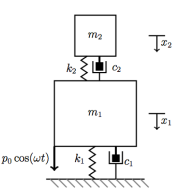

Consider the standard 2-DOF system consists of two masses (m1 and m2) coupled by springs (k1,k2) and dampers (c1,c2) shown in figure above. By choosing the equilibrium positions of the masses as starting points and applying Newton's laws for small amplitude deflections,

For $m_1$,

$$m_1 \ddot{x}_1 + (c_1+c_2)\dot{x}_1+(k_1+k_2)x_1 - c_2\dot{x}_2 - k_2 x_2 = f_1(t)
\tag{1}
$$

For $m_2$,
$$m_2 \ddot{x}_2 + c_2\dot{x}_2+k_2x_2 - c_2\dot{x}_1 - k_2 x_1 = 0 \tag{2}$$


Converting (1) and (2) to second order matrix ODE,

$$ M\ddot{\mathbf{x}} + C\dot{\mathbf{x}} + K\mathbf{x} =f(t) \tag{3}$$

Mass Matrix,
\begin{equation}
M =
\begin{bmatrix}
m_1 & 0 \\ 0 & m_2
\end{bmatrix}
\end{equation}

Damping Matrix,
\begin{equation}
C =
\begin{bmatrix}
c_1+c_2 & -c_2 \\ -c_2 & c_2
\end{bmatrix}
\end{equation}

Stiffness Matrix,
\begin{equation}
K =
\begin{bmatrix}
k_1+k_2 & -k_2 \\ -k_2 & k_2
\end{bmatrix}
\end{equation}

Displacement Vectors,
\begin{equation}
\mathbf{x} =
\begin{bmatrix}
x_1(t) \\ x_2(t)
\end{bmatrix}
\end{equation}

Force Vectors,
\begin{equation}
f(t) =
\begin{bmatrix}
f_1(t) \\ 0
\end{bmatrix}
\end{equation}

Assume $C \approx 0$, since dominant vibration behaviour best visible under no/ negligible damping.
Multiply (3) by $M^{-1}$,
$$ \ddot{\mathbf{x}}+ \Omega\mathbf{x} = M^{-1}f(t) \tag{4}$$

Where $\Omega = M^{-1}K$.

The dominant modes of the system are determined by finding the eigenvalues of the matrix $\Omega$
$$det(-\omega^2I+\Omega)=0$$

The square roots of the eigenvalues provide the two undamped resonance frequencies ($\omega_1$ and $\omega_2$), which represent the first two dominant modes.
To clearly see the two modes, we use a coordinate transformation ($x=Tz$), where $T$ is a matrix composed of the eigenvectors of $\Omega$.

\begin{equation}
T =
\begin{bmatrix}
\bar{\mathbf{x}}_1 \\ \bar{\mathbf{x}}_2
\end{bmatrix}
\end{equation}

\begin{equation}
T =
\begin{bmatrix}
\bar{\mathbf{x}}_{11} & \bar{\mathbf{x}}_{12}  \\ \bar{\mathbf{x}}_{21} & \bar{\mathbf{x}}_{22}
\end{bmatrix}
\end{equation}

$$\ddot{z}_1+{\omega_1}^2 z_1 = \gamma_1 f_1(t)^2$$
$$\ddot{z}_2+{\omega_2}^2 z_2 = \gamma_2 f_1(t)^2$$

The final response of the system is a linear combination of these two modes,
$$\mathbf{x}(t) = \bar{\mathbf{x}}_1 z_1(t) + \bar{\mathbf{x}}_2 z_2(t)  $$

### **For system of cantilever beam**

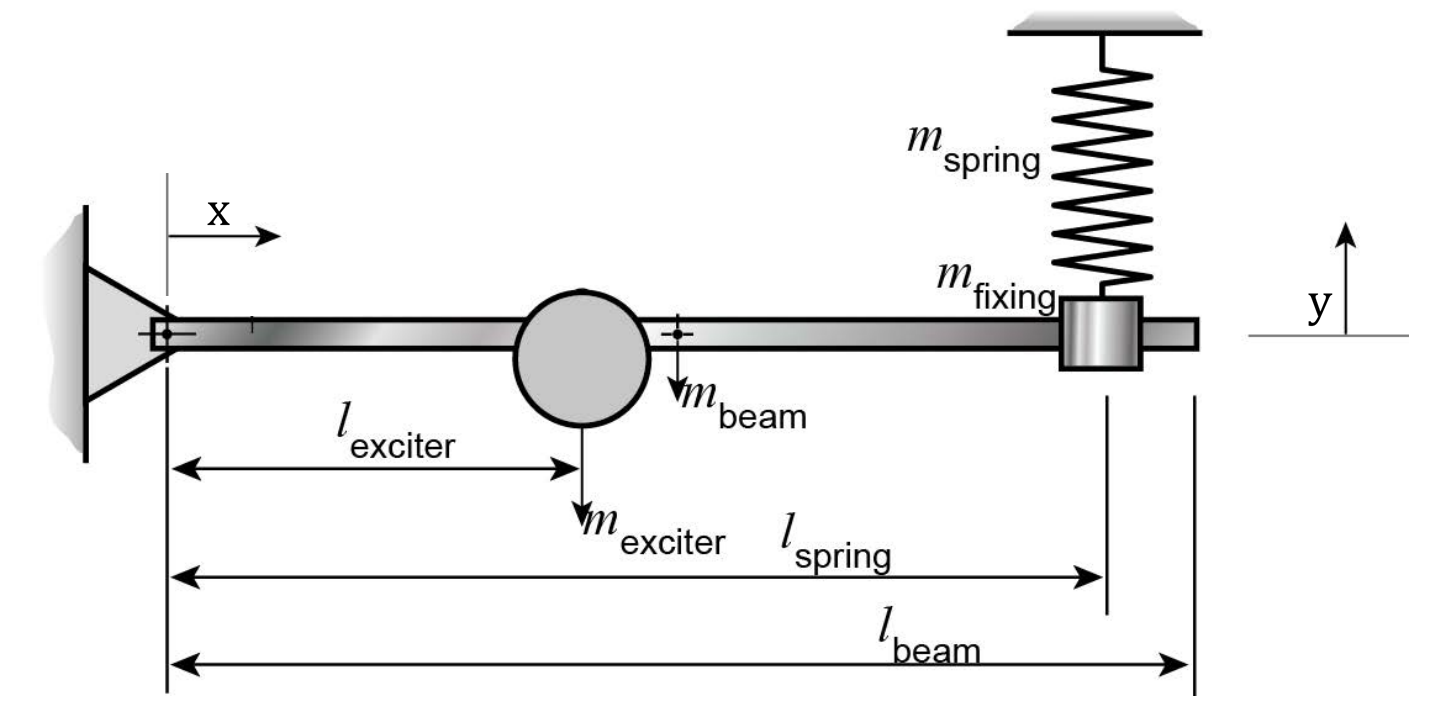

When absorber is attached to the main simply supported beam, the entire setup becomes a 2-Degree-of-Freedom (2-DOF) system.

- $m_1$ - The effective mass of the main simply supported beam (including the exciter and part of the beam mass)
- $m_2$ - The effective mass of the vibration absorber.
- $y_1(t)$ - Vertical displacement of the main beam from equilibrium.
- $y_2(t)$ - Vertical displacement of the vibration absorber masses from equilibrium.
- $k_1$: Effective stiffness of the main beam ($k_{beam}$).
\begin{equation}
k_{beam} = \frac{48EI_{beam}}{L^3_{beam}}
\end{equation}
- $k_2$: Stiffness of \textit{one} cantilever absorber arm ($k_{absorber}$)
\begin{equation}
k_{absorber} = \frac{3EI_{absorber}}{l^3_{absorber}}
\end{equation}
- External force, $F(t)=Qsin(Ωt)$

Applying Newton's Second Law to the main mass and the absorber masses,
\begin{equation}
m_1 \ddot{y}_1 = -k_1 y_1 + 2k_2 (y_2 - y_1) + Q \sin(\Omega t)
\end{equation}
\begin{equation}
2m_2 \ddot{y}_2 = -2k_2 (y_2 - y_1)
\end{equation}

The system of equations can be written in the standard matrix form,

\begin{equation}
\begin{bmatrix}
m_1 & 0 \\
0 & 2m_2
\end{bmatrix}
\begin{bmatrix}
\ddot{y}_1 \\
\ddot{y}_2
\end{bmatrix}
+
\begin{bmatrix}
k_1 + 2k_2 & -2k_2 \\
-2k_2 & 2k_2
\end{bmatrix}
\begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}
=
\begin{bmatrix}
Q \sin(\Omega t) \\
0
\end{bmatrix}
\end{equation}

To find the dominant modes consider the free vibration case,

\begin{equation}
\det([K] - \omega^2 [M]) = 0
\end{equation}

\begin{equation}
\det \begin{bmatrix}
k_1 + 2k_2 - m_1 \omega^2 & -2k_2 \\
-2k_2 & 2k_2 - 2m_2 \omega^2
\end{bmatrix} = 0
\end{equation}

\begin{equation}
(k_1 + 2k_2 - m_1 \omega^2)(2k_2 - 2m_2 \omega^2) - (-2k_2)(-2k_2) = 0
\end{equation}

by expanding this,
\begin{equation}
m_1 m_2 \omega^4 - [m_1 k_2 + m_2 k_1 + 2 m_2 k_2] \omega^2 + k_1 k_2 = 0
\end{equation}

Take,
- $\omega_{beam}^2 = \frac{k_1}{m_1}$ (Natural frequency of main beam)
- $\omega_{abs}^2 = \frac{k_2}{m_2}$ (Natural frequency of absorber cantilever)
- $\mu = \frac{2m_2}{m_1}$ (Mass ratio)

Dividing the characteristic equation by $m_1 m_2$ and substituting those terms,
\begin{equation}
\omega^4 - \left[ \omega_{abs}^2 + \omega_{beam}^2 + \omega_{abs}^2 \mu \right] \omega^2 + \omega_{beam}^2 \omega_{abs}^2 = 0
\end{equation}

By solving this quadratic equation,
\begin{equation}
\omega_{1,2}^2 = \frac{1}{2} \left( (\omega_{beam}^2 + \omega_{abs}^2(1+\mu)) \mp \sqrt{ (\omega_{beam}^2 + \omega_{abs}^2(1+\mu))^2 - 4 \omega_{beam}^2 \omega_{abs}^2 } \right)
\end{equation}

The two natural frequencies are:
\begin{equation}
\omega_1 = \sqrt{\frac{\Omega_{sum} - \sqrt{\Omega_{sum}^2 - 4 \omega_{beam}^2 \omega_{abs}^2}}{2}}
\end{equation}
\begin{equation}
\omega_2 = \sqrt{\frac{\Omega_{sum} + \sqrt{\Omega_{sum}^2 - 4 \omega_{beam}^2 \omega_{abs}^2}}{2}}
\end{equation}
where $\Omega_{sum} = \omega_{beam}^2 + \omega_{abs}^2(1+\mu)$.

$\omega_1$: First dominant mode.

$\omega_2$: Second dominant mode.

In [36]:
def calculate_theoretical_modes():

    k1 = params['k1']
    m1 = params['m1']
    k2 = params['k2']
    m2 = params['m2']

    M = np.array([[m1, 0],
                  [0, m2]])
    K = np.array([[k1 + k2, -k2],
                  [-k2,      k2]])

    evals, evecs = linalg.eigh(K, M)

    frequencies_rad = np.sqrt(evals)
    frequencies_hz = frequencies_rad / (2 * np.pi)
    idx = frequencies_rad.argsort()
    frequencies_hz = frequencies_hz[idx]
    evecs = evecs[:, idx]
    print(f"Calculated Modes (Theoretical):")
    for i in range(2):
        f_hz = frequencies_hz[i]
        w_rad = frequencies_rad[idx][i]
        shape = evecs[:, i]
        ratio = shape[1] / shape[0]

        print(f"\nMode {i+1}:")
        print(f"  Natural Frequency: {f_hz:.2f} Hz  ({w_rad:.2f} rad/s)")

calculate_theoretical_modes()

Calculated Modes (Theoretical):

Mode 1:
  Natural Frequency: 4.14 Hz  (25.99 rad/s)

Mode 2:
  Natural Frequency: 8.40 Hz  (52.79 rad/s)


## **Activity 2 - Estimate the damping ratios of the first two dominant modes.**

From therory,
\begin{align}
\omega_{k_r}=\omega_k\sqrt{1-2\zeta_k^2}
\end{align}
\begin{align}
{y_{ss}}_{k_{max}}&=\frac{f_0\sin(k\pi/2)}{L\zeta_k\omega_k^2\sqrt{1-\zeta_k^2}}\\
{a_{ss}}_{k_{max}}&=\frac{f_0\sin(k\pi/2)}{L\zeta_k\sqrt{1-\zeta_k^2}}.
\end{align}

Assume $$\zeta_k << 1$$.Therefore,
$$\sqrt{1-\zeta^2_k} \approx 1 $$

Then,
\begin{align}
\omega_{k_r}=\omega_k
\end{align}


\begin{align}
{y_{ss}}_{k_{max}}&\approx\frac{f_0\sin(k\pi/2)}{L\omega_k^2\zeta_k}=\frac{2f_0\sin(k\pi/2)}{\omega_kLC}\\
{a_{ss}}_{k_{max}}&\approx\frac{f_0\sin(k\pi/2)}{L\zeta_k}=\frac{2\omega_kf_0\sin(k\pi/2)}{LC}
\end{align}

\begin{align}
C=2\zeta_k\omega_k
\end{align}

Rearranging this gives the formula for the damping ratio,

$$\zeta_k=\frac{C}{2\omega_k}$$

$$y_{max}.\omega \approx \frac{2f_0}{LC}$$

$$\frac{a_{max}}{\omega} \approx \frac{2f_0}{LC}$$

$$M = \frac{2f_0}{LC}$$

$y_{max}$ -Peak displacement

$a_{max}$ -Peak acceleration

$\omega$ -Peak natural frequency (in rad/s).

### For Caltiliver beam and first two modes,


In [42]:
# For Mode 1
w1 = 4.14 # rad/s
y1_max = 1
a1_max = 1

# For Mode 2
w2 = 8.40 # rad/s
y2_max = 1
a2_max = 1

f0 = params['F0']
L = params['L']

In [44]:
# Choose One
M1 = y1_max * w1
M1 = a1_max / w1

# Choose One
M2 = y2_max * w2
M2 = a2_max / w2

M = (M1+M2)/2

c_1 = f0 /(L*M*w1)
c_2 = f0 /(L*M*w2)

params['c1'] = c_1
params['c2'] = c_2
display(c_1,c_2)

13.397129186602873

6.602870813397129

## **Activity 3 - Response Plot.**

System Parameters Taken from TM1016V User Guide

In [45]:
# @title
wn1 = np.sqrt(params['k1'] / params['m1'])
zeta1 = params['c1'] / (2 * np.sqrt(params['k1'] * params['m1']))
wd1 = wn1 * np.sqrt(1 - zeta1**2)

In [46]:
# @title
def plot_free_vibration():
    t = np.linspace(0, 2.0, 500)
    decay = np.exp(-zeta1 * wn1 * t)
    x_t = decay * (params['x0'] * np.cos(wd1 * t) +
                   (zeta1 * wn1 * params['x0'] / wd1) * np.sin(wd1 * t))

    plt.figure(figsize=(10, 5))
    plt.plot(t, x_t, label='Displacement (y)', color='blue')
    plt.plot(t, params['x0'] * decay, 'r--', label='Exponential Envelope')
    plt.plot(t, -params['x0'] * decay, 'r--')
    plt.title('1. Unforced Response to Initial Displacement (Free Vibration)')
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_forced_response():
    omegas = [0.5 * wn1, 1.0 * wn1, 2.5 * wn1]
    labels = ['Below Resonance (0.5 ωn)', 'At Resonance (1.0 ωn)', 'Above Resonance (2.5 ωn)']
    colors = ['green', 'red', 'purple']

    t = np.linspace(0, 3.0, 1000)

    plt.figure(figsize=(10, 6))

    for omega, label, color in zip(omegas, labels, colors):
        r = omega / wn1
        mag_factor = 1 / np.sqrt((1 - r**2)**2 + (2 * zeta1 * r)**2)
        X_amp = (params['F0'] / params['k1']) * mag_factor
        phase = np.arctan2(2 * zeta1 * r, 1 - r**2)

        x_forced = X_amp * np.sin(omega * t - phase)
        plt.plot(t, x_forced, label=f'{label} ({omega/(2*np.pi):.1f} Hz)', color=color)

    plt.title('2. Forced Response at Different Motor Speeds')
    plt.xlabel('Time (s)')
    plt.ylabel('Steady-State Displacement (m)')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()

def plot_2dof_freq_response():
    freq_hz = np.linspace(0, 25, 1000)
    w = freq_hz * 2 * np.pi

    m1, k1, m2, k2 = params['m1'], params['k1'], params['m2'], params['k2']

    k1_c = k1 * (1 + 0.02j)
    k2_c = k2 * (1 + 0.02j)

    num = k2_c - m2 * w**2
    denom = (k1_c + k2_c - m1 * w**2) * (k2_c - m2 * w**2) - (k2_c)**2

    H_w = num / denom
    amp = np.abs(H_w)

    plt.figure(figsize=(10, 5))
    plt.plot(freq_hz, amp, color='black', linewidth=1.5)
    plt.title('3. Theoretical Frequency Response (2-DOF System)')
    plt.xlabel('Excitation Frequency (Hz)')
    plt.ylabel('Amplitude |H(ω)|')

    # plt.axvline(x=np.sqrt(k2/m2)/(2*np.pi), color='orange', linestyle='--', label='Absorber Tuned Freq')
    # # plt.text(np.sqrt(k2/m2)/(2*np.pi), max(amp)*0.1, ' Antiresonance', color='orange')

    plt.grid(True, which="both", ls="-")
    plt.legend()
    plt.show()

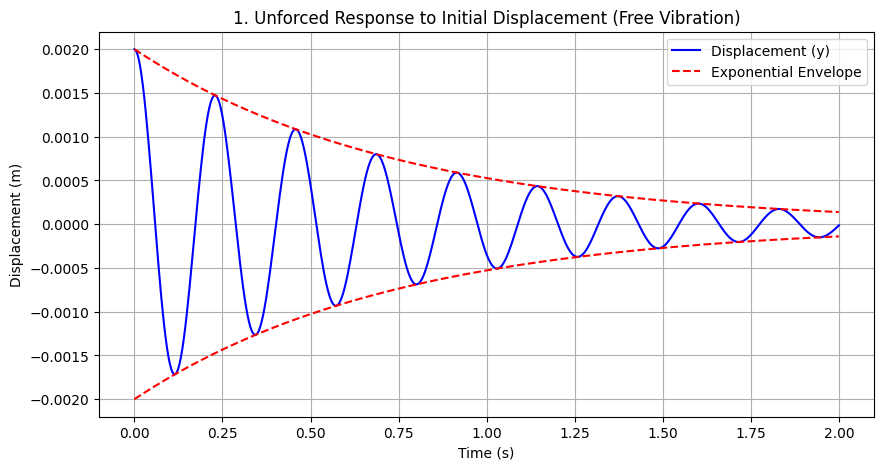

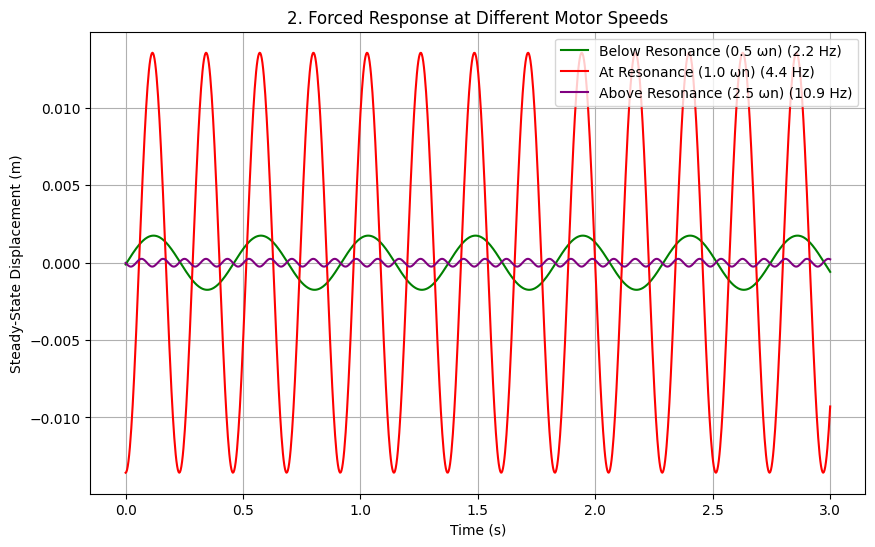

/tmp/ipython-input-1150711730.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


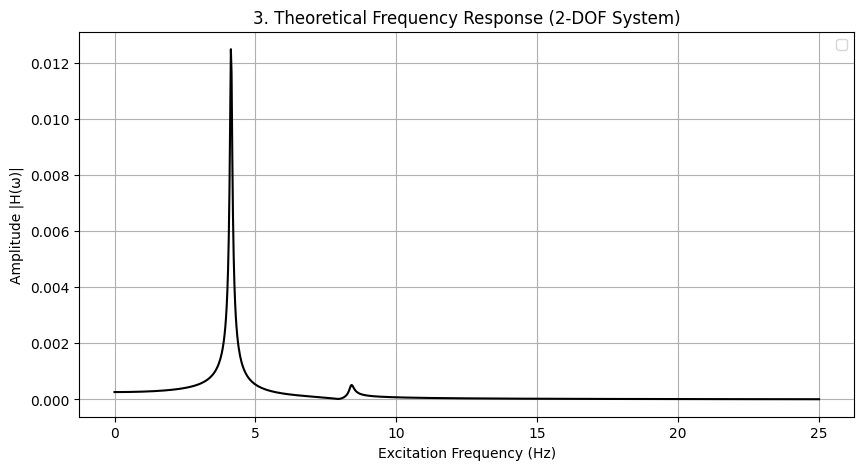

In [47]:
plot_free_vibration()
plot_forced_response()
plot_2dof_freq_response()